In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df: pd.DataFrame = pd.read_csv("data/data.csv")
df.head()

,unique_hand,solvable,solution,num_combs,num_perms
0,"(1, 1, 1, 1)",False,NaN,1,24
1,"(1, 1, 1, 2)",False,NaN,16,384
2,"(1, 1, 1, 3)",False,NaN,16,384
3,"(1, 1, 1, 4)",False,NaN,16,384
4,"(1, 1, 1, 5)",False,NaN,16,384


In [3]:
df["rand"] = np.random.randint(0, 1000000, len(df))
df_rand = df.sort_values("rand")
df_rand.head()

,unique_hand,solvable,solution,num_combs,num_perms,rand
1463,"(5, 9, 10, 13)",True,(10 / 5) + (9 + 13),256,6144,63
264,"(1, 4, 7, 9)",True,(4 - 7) * (1 - 9),256,6144,813
721,"(2, 6, 9, 10)",True,(6 - 9) * (2 - 10),256,6144,1318
281,"(1, 4, 10, 11)",True,11 - ((1 - 4) - 10),256,6144,1730
809,"(2, 11, 11, 11)",True,((11 / 11) + 11) * 2,16,384,2078


In [26]:
solvable_by_num_combs = df.groupby("num_combs").agg({"solvable": [
    "count",
    lambda solvables: sum(solvables),
    lambda solvables: sum(~solvables)
]})

solvable_by_num_combs.columns = ["count", "num_solvable", "num_not_solvable"]
solvable_by_num_combs["prob_solvable"] = \
    solvable_by_num_combs["num_solvable"] / solvable_by_num_combs["count"]
solvable_by_num_combs = solvable_by_num_combs.reset_index()
solvable_by_num_combs["note"] = [
    "4 of a kind", "3 of a kind + 1 single", "2 pairs", "1 pair + 2 singles", "4 singles"
]
solvable_by_num_combs

,num_combs,count,num_solvable,num_not_solvable,prob_solvable,note
0,1,13,5,8,0.384615,4 of a kind
1,16,156,86,70,0.551282,3 of a kind + 1 single
2,36,78,45,33,0.576923,2 pairs
3,96,858,619,239,0.721445,1 pair + 2 singles
4,256,715,607,108,0.848951,4 singles


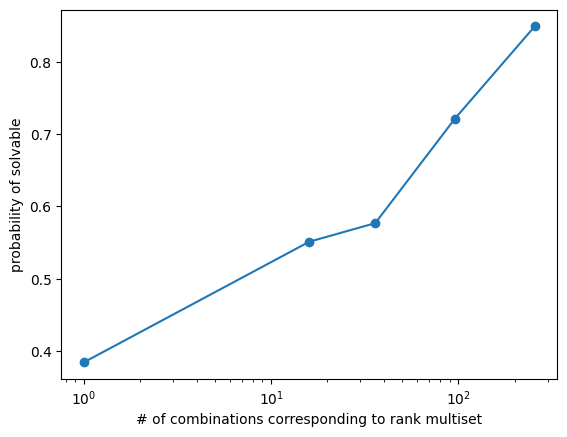

In [25]:
plt.plot(solvable_by_num_combs.num_combs, solvable_by_num_combs.prob_solvable)
plt.scatter(solvable_by_num_combs.num_combs, solvable_by_num_combs.prob_solvable)
plt.semilogx()
plt.xlabel("# of combinations corresponding to rank multiset")
plt.ylabel("probability of solvable")
plt.show()